In [1]:
%matplotlib inline

### K Nearest Neighbors

![KNN Algorithm](https://miro.medium.com/max/700/0*34SajbTO2C5Lvigs.png)  
Credit: [https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4]  

Advantage: 
* No mathematics is required. Easy to explain the results.

Disadvantge: 
* Memory intensive. 1m examples? store them all.
* Prediction takes a long time
* Do not have a model that describle the data

### How to test the classifier

#### Leave one out
 * Take all of your n examples, remove one of them, train on (n-1), test on the 1. 
 * Then you put that 1 back and remove another 1. Train on (n-1), test on 1. 
 * And you do this for each element of the data, and then you average your results.
#### Repeated random subsampling
 * When you have a larger set of data, and there you might say split your data 80/20. 
 * Take 80% of the data to train on, test it on 20. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import datasets

iris = datasets.load_iris()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
#the features and targets are numpy arrays
knn.fit(iris['data'], iris['target']) 

X_new = iris['data'][20:100]
y_new = iris['target'][20:100]

prediction = knn.predict(X_new)
knn.score(X_new,y_new)

0.975

In [4]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays
X = iris.data
y = iris.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=30, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9736842105263158


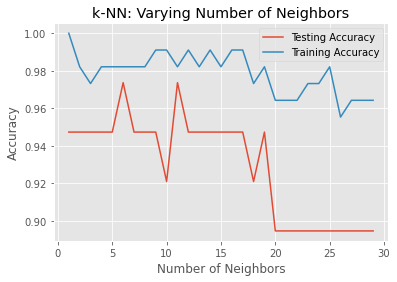

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()